In [1]:
import pandas as pd

import numpy as np  

In [99]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score

from sklearn.preprocessing import KBinsDiscretizer 

from sklearn.compose import ColumnTransformer

from sklearn.model_selection import cross_val_score



In [100]:
df=pd.read_csv('C:/Users/vaibh/Downloads/train.csv',usecols=['Survived','Age','Fare','SibSp','Parch'])

In [101]:
df

,Survived,Age,SibSp,Parch,Fare
0,0,22.0,1,0,7.2500
1,1,38.0,1,0,71.2833
2,1,26.0,0,0,7.9250
3,1,35.0,1,0,53.1000
4,0,35.0,0,0,8.0500
...,...,...,...,...,...
886,0,27.0,0,0,13.0000
887,1,19.0,0,0,30.0000
888,0,NaN,1,2,23.4500
889,1,26.0,0,0,30.0000


In [35]:
df.isnull().sum()

Survived      0
Age         177
SibSp         0
Parch         0
Fare          0
dtype: int64

In [46]:
df.fillna(df['Age'].mean(),inplace=True)

In [47]:
df

,Survived,Age,SibSp,Parch,Fare
0,0,22.000000,1,0,7.2500
1,1,38.000000,1,0,71.2833
2,1,26.000000,0,0,7.9250
3,1,35.000000,1,0,53.1000
4,0,35.000000,0,0,8.0500
...,...,...,...,...,...
886,0,27.000000,0,0,13.0000
887,1,19.000000,0,0,30.0000
888,0,29.699118,1,2,23.4500
889,1,26.000000,0,0,30.0000


In [50]:
df['Family']=df['Parch'] + df['SibSp']

df

,Survived,Age,SibSp,Parch,Fare,Family
0,0,22.000000,1,0,7.2500,1
1,1,38.000000,1,0,71.2833,1
2,1,26.000000,0,0,7.9250,0
3,1,35.000000,1,0,53.1000,1
4,0,35.000000,0,0,8.0500,0
...,...,...,...,...,...,...
886,0,27.000000,0,0,13.0000,0
887,1,19.000000,0,0,30.0000,0
888,0,29.699118,1,2,23.4500,3
889,1,26.000000,0,0,30.0000,0


In [51]:
df.drop(columns=['SibSp','Parch'],inplace=True)

In [52]:
df

,Survived,Age,Fare,Family
0,0,22.000000,7.2500,1
1,1,38.000000,71.2833,1
2,1,26.000000,7.9250,0
3,1,35.000000,53.1000,1
4,0,35.000000,8.0500,0
...,...,...,...,...
886,0,27.000000,13.0000,0
887,1,19.000000,30.0000,0
888,0,29.699118,23.4500,3
889,1,26.000000,30.0000,0


In [53]:
x=df.iloc[:,1:4]
y=df.iloc[:,0]

In [56]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.3)

In [57]:
# without  binarization

dt=DecisionTreeClassifier()

dt.fit(x_train,y_train)

y_predict=dt.predict(x_test)

accuracy_score(y_test,y_predict)

0.6194029850746269

In [59]:
np.mean(cross_val_score(dt,x,y,scoring='accuracy',cv=10))

0.6464918851435706

In [62]:
# with binarization 

kbin_age=KBinsDiscretizer(n_bins=10,encode='ordinal',strategy='quantile')

# 

kbin_fare=KBinsDiscretizer(n_bins=10,encode='ordinal',strategy='quantile')

In [65]:
trf=ColumnTransformer([
    
    ("first",kbin_age,[1]),
    ('second',kbin_fare,[2])
    
    
    
    ],remainder='passthrough')

In [69]:
x_train_transform=trf.fit_transform(x_train)
x_test_transform=trf.fit_transform(x_test)


dt=DecisionTreeClassifier()

dt.fit(x_train_transform,y_train)

y_predict1=dt.predict(x_test_transform)

accuracy_score(y_test,y_predict1)

C:\Users\vaibh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\preprocessing\_discretization.py:307: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.
  warnings.warn(
C:\Users\vaibh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\preprocessing\_discretization.py:307: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.
  warnings.warn(


0.6156716417910447

In [80]:
trf.named_transformers_['first'].n_bins

10

In [82]:
trf.named_transformers_['first'].bin_edges_

array([array([  0.     ,   7.29375,   7.8542 ,   8.05   ,  10.4625 ,  13.     ,
               20.525  ,  26.225  ,  36.40252,  79.335  , 512.3292 ])          ],
      dtype=object)

In [87]:
trf.named_transformers_['second'].bin_edges_

array([array([ 0.,  1.,  2.,  3., 10.])], dtype=object)

In [97]:
pd.DataFrame(x_train_transform,columns=['Fare','Family','Age'])

,Fare,Family,Age
248,6.0,1.0,42.000000
411,4.0,0.0,30.000000
148,0.0,0.0,47.000000
380,1.0,0.0,29.699118
598,4.0,0.0,36.000000


In [95]:
df.sample(8)

,Survived,Age,Fare,Family
611,0,29.699118,7.0500,0
827,1,1.000000,37.0042,2
730,1,29.000000,211.3375,0
289,1,22.000000,7.7500,0
437,1,24.000000,18.7500,5
19,1,29.699118,7.2250,0
304,0,29.699118,8.0500,0
72,0,21.000000,73.5000,0


In [98]:
X_trf = trf.fit_transform(x)
np.mean(cross_val_score(DecisionTreeClassifier(),X_trf,y,cv=10,scoring='accuracy'))

C:\Users\vaibh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\preprocessing\_discretization.py:307: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.
  warnings.warn(


0.6521348314606741

In [102]:
df

,Survived,Age,SibSp,Parch,Fare
0,0,22.0,1,0,7.2500
1,1,38.0,1,0,71.2833
2,1,26.0,0,0,7.9250
3,1,35.0,1,0,53.1000
4,0,35.0,0,0,8.0500
...,...,...,...,...,...
886,0,27.0,0,0,13.0000
887,1,19.0,0,0,30.0000
888,0,NaN,1,2,23.4500
889,1,26.0,0,0,30.0000


In [103]:
df.isnull().sum()

Survived      0
Age         177
SibSp         0
Parch         0
Fare          0
dtype: int64

In [105]:
df.fillna(df['Age'].mean(),inplace=True)

In [108]:
df.isnull().sum()

Survived    0
Age         0
SibSp       0
Parch       0
Fare        0
dtype: int64

In [109]:
df

,Survived,Age,SibSp,Parch,Fare
0,0,22.000000,1,0,7.2500
1,1,38.000000,1,0,71.2833
2,1,26.000000,0,0,7.9250
3,1,35.000000,1,0,53.1000
4,0,35.000000,0,0,8.0500
...,...,...,...,...,...
886,0,27.000000,0,0,13.0000
887,1,19.000000,0,0,30.0000
888,0,29.699118,1,2,23.4500
889,1,26.000000,0,0,30.0000


In [138]:
df['family']=df['SibSp']+df['Parch']

In [142]:
df.drop(columns=['SibSp','Parch'],inplace=True)

In [141]:
df

,Survived,Age,SibSp,Parch,Fare,family
0,0,22.000000,1,0,7.2500,1
1,1,38.000000,1,0,71.2833,1
2,1,26.000000,0,0,7.9250,0
3,1,35.000000,1,0,53.1000,1
4,0,35.000000,0,0,8.0500,0
...,...,...,...,...,...,...
886,0,27.000000,0,0,13.0000,0
887,1,19.000000,0,0,30.0000,0
888,0,29.699118,1,2,23.4500,3
889,1,26.000000,0,0,30.0000,0


In [143]:
df

,Survived,Age,Fare,family
0,0,22.000000,7.2500,1
1,1,38.000000,71.2833,1
2,1,26.000000,7.9250,0
3,1,35.000000,53.1000,1
4,0,35.000000,8.0500,0
...,...,...,...,...
886,0,27.000000,13.0000,0
887,1,19.000000,30.0000,0
888,0,29.699118,23.4500,3
889,1,26.000000,30.0000,0


In [157]:
x=df.iloc[:,1:]
y=df.iloc[:,0]


x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.3,random_state=42)

bin_age=KBinsDiscretizer(n_bins=10,strategy='quantile',encode='ordinal')


bin_fare=KBinsDiscretizer(n_bins=10,strategy='quantile',encode='ordinal')

trf=ColumnTransformer([
    
    
    ('first',bin_age,[1]),
    ('second',bin_fare,[2])
    
])



x_train_trf=trf.fit_transform(x_train)
x_test_trf=trf.fit_transform(x_test)


clf=DecisionTreeClassifier()
clf.fit(x_train_trf,y_train)


y_predict=clf.predict(x_test_trf)

accuracy_score(y_test,y_predict)


C:\Users\vaibh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\preprocessing\_discretization.py:307: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.
  warnings.warn(
C:\Users\vaibh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\preprocessing\_discretization.py:307: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.
  warnings.warn(


0.6791044776119403

In [159]:
np.mean(cross_val_score(clf,x,y,scoring='accuracy',cv=10))


0.6487390761548064

In [167]:
import matplotlib.pyplot as plt

import seaborn as sns

import numpy as np

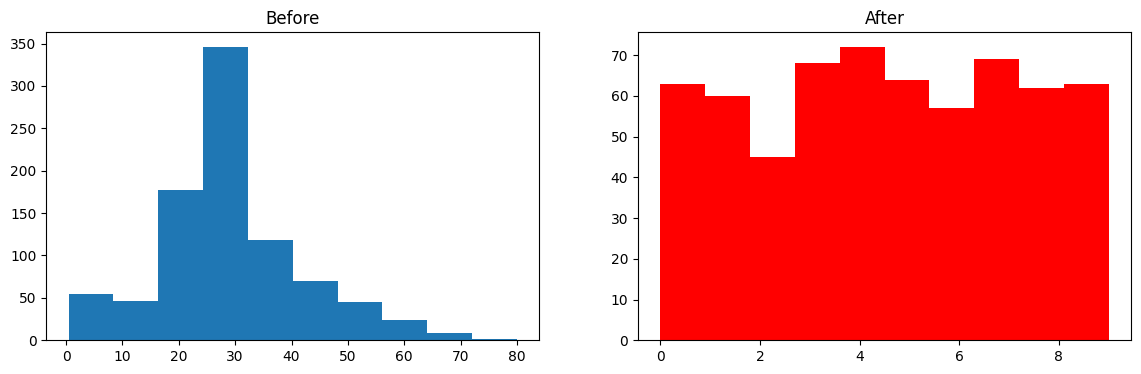

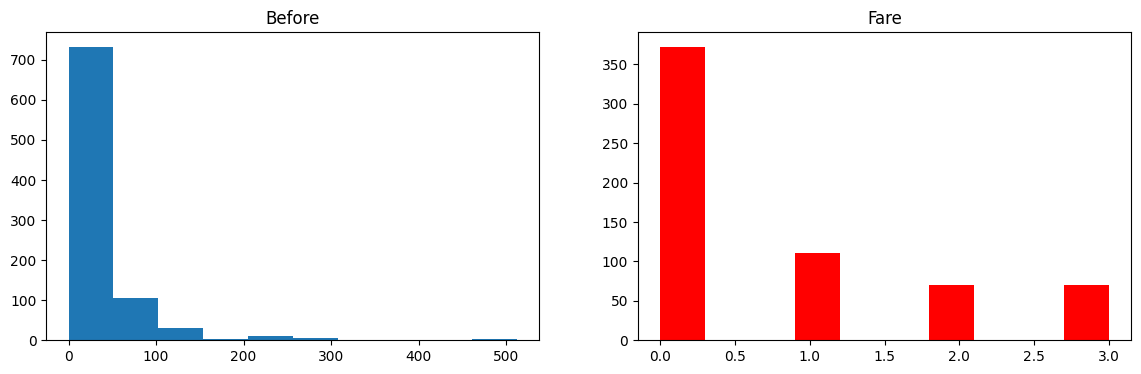

In [170]:
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    plt.hist(x['Age'])
    plt.title("Before")

    plt.subplot(122)
    plt.hist(x_train_trf[:,0],color='red')
    plt.title("After")

    plt.show()
    
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    plt.hist(x['Fare'])
    plt.title("Before")

    plt.subplot(122)
    plt.hist(x_train_trf[:,1],color='red')
    plt.title("Fare")

    plt.show()
    

In [171]:
x

,Age,Fare,family
0,22.000000,7.2500,1
1,38.000000,71.2833,1
2,26.000000,7.9250,0
3,35.000000,53.1000,1
4,35.000000,8.0500,0
...,...,...,...
886,27.000000,13.0000,0
887,19.000000,30.0000,0
888,29.699118,23.4500,3
889,26.000000,30.0000,0
